In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
input_images_name = ['input_0.png', 'input_1.png', 'input_2.png']

In [3]:
def trim(image):
    left = -1
    right = -1
    top = -1
    bottom = -1

    for i in range(image.shape[0]):
        if np.any(image[i] > 0):
            top = i
            break
    for i in range(image.shape[0] - 1, -1, -1):
        if np.any(image[i] > 0):
            bottom = i
            break
    for i in range(image.shape[1]):
        if np.any(image[:, i] > 0):
            left = i
            break
    for i in range(image.shape[1] - 1, -1, -1):
        if np.any(image[:, i] > 0):
            right = i
            break
    print(left, right, top, bottom)
    image = image[top:bottom, left:right]
    return image


0 412 0 179
0 239


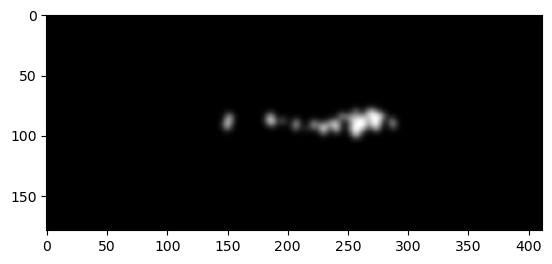

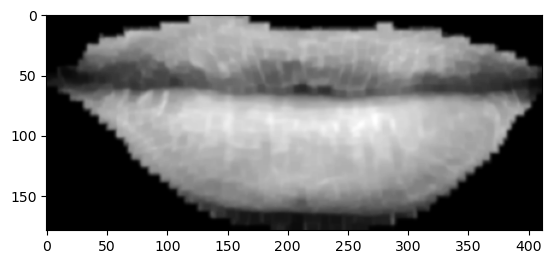

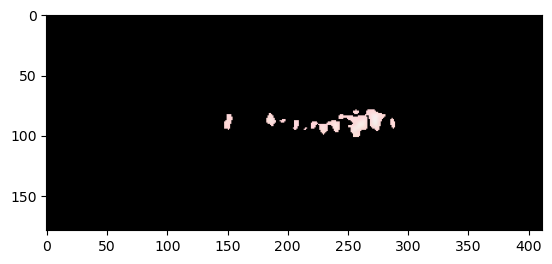

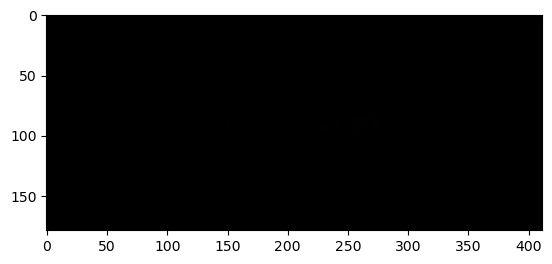

53421 73748
0 580 0 323
0 234


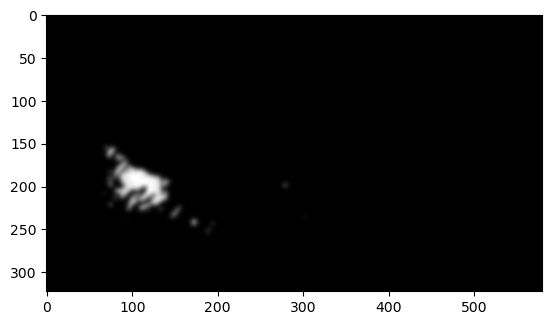

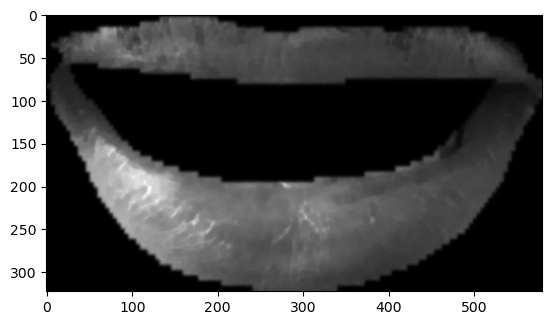

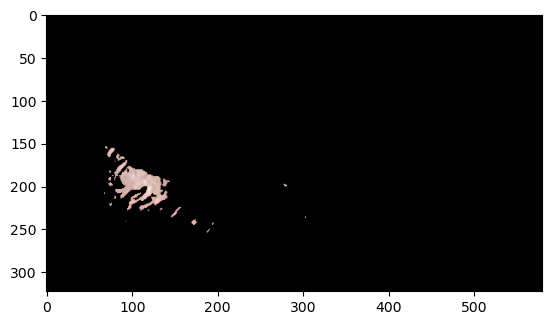

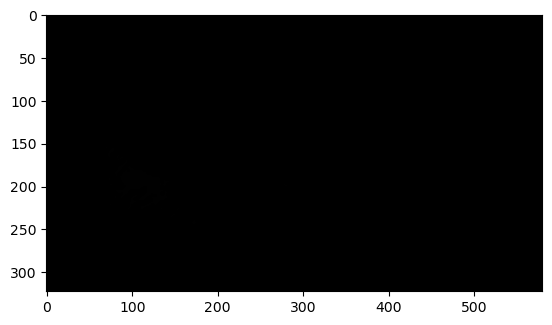

105614 187340
0 100 0 34
0 140


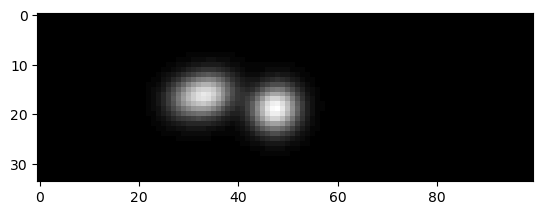

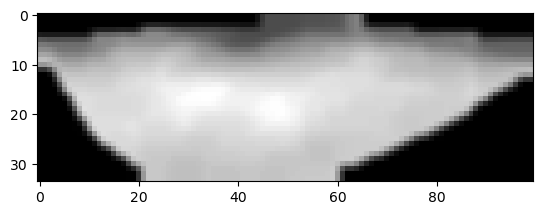

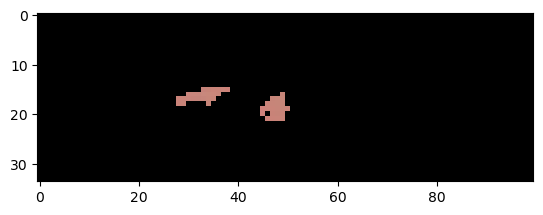

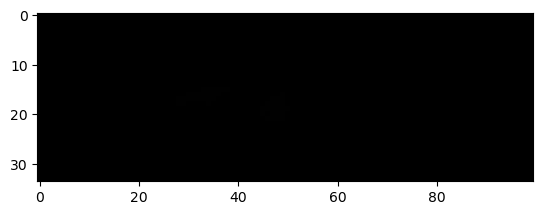

2351 3400


In [8]:
def f(power = 0.5, blur = 30):
    if blur % 2 == 0:
        blur = blur + 1

    for image_name in input_images_name:
        main_image = trim(cv2.imread(image_name))
        main_image = cv2.cvtColor(main_image, cv2.COLOR_BGR2RGB)
        gray_image = cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY)

        ret = gray_image.copy()
        overlay = np.zeros_like(main_image)
        height, width = gray_image.shape
        
        threshold = np.percentile(gray_image, 100 - power)
        totalPixel = 0
        count = 0
        for i in range(0, height):
            for j in range(0, (width)):
                grayColor = ret[i, j]
                if grayColor > 0:
                    totalPixel += 1
                if grayColor < threshold:
                    ret[i, j] = 0
                else:
                    ret[i, j] = grayColor
                    count += 1
                overlay[i,j] = [ret[i,j]*255.0]
        
        print(np.min(ret), np.max(ret))

        ret = cv2.GaussianBlur(ret, (blur, blur), 0)
        lip_mask = cv2.morphologyEx(gray_image, cv2.MORPH_CLOSE, np.ones((5,5), np.uint8))
        lip_mask = cv2.GaussianBlur(lip_mask, (3,3), 0)

        
        for i in range(height):
            for j in range(width):
                overlay[i, j] = overlay[i, j] + overlay[i, j] * lip_mask[i, j] / 255.0
                overlay[i,j] = np.clip(overlay[i,j], 0, 1)

        # Apply the glossy effect only to the lip region using the mask
        glossy_image = main_image * overlay

        # plot ret, lip_mask, glossy_image, overlay
        plt.imshow(ret, cmap='gray')
        plt.show()
        plt.imshow(lip_mask, cmap='gray')
        plt.show()
        plt.imshow(glossy_image)
        plt.show()
        plt.imshow(overlay)
        plt.show()
        print(totalPixel , height * width)


f(1.0, 17)

In [504]:
input_images_name = ['input_0.png', 'input_1.png', 'input_2.png']
# input_images = []
# for name in input_images_name:
#     image = cv2.imread(name)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
#     input_images.append(trim(image))